### Import Dependencies

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt


##### To optimize model performance using GridSearchCV or RandomizedSearchCV on:

##### Logistic Regression

##### Random Forest

##### XGBoost

### 2: Load/Reuse Processed Data

In [10]:
df = pd.read_csv("../data/processed/diabetes_cleaned.csv")

In [11]:
X = df.drop("diabetic", axis=1)
y = df["diabetic"]

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=6)
X_selected = selector.fit_transform(X_scaled, y)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


#### 1. Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

print(" Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))


 Logistic Regression Results
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        92
           1       0.44      0.53      0.48        36

    accuracy                           0.68       128
   macro avg       0.62      0.63      0.62       128
weighted avg       0.70      0.68      0.69       128



#### 2. Random Forest


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(" Random Forest Results")
print(classification_report(y_test, y_pred_rf))


 Random Forest Results
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        92
           1       0.56      0.64      0.60        36

    accuracy                           0.76       128
   macro avg       0.71      0.72      0.71       128
weighted avg       0.77      0.76      0.76       128



#### 3. XGBoost

In [19]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("⚡ XGBoost Results")
print(classification_report(y_test, y_pred_xgb))


⚡ XGBoost Results
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        92
           1       0.50      0.67      0.57        36

    accuracy                           0.72       128
   macro avg       0.68      0.70      0.68       128
weighted avg       0.75      0.72      0.73       128



/usr/local/anaconda3/envs/MSC/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:45:33] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_7eg2b3w9sf/croot/xgboost-split_1749630922962/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 3: Define Parameter Grids

In [4]:
# Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

In [5]:
# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}


In [6]:
# XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1, 0.2]
}

### 4: Perform Grid Search

In [20]:
# Logistic Regression
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_param_grid, cv=5, scoring='f1')
lr_grid.fit(X_train_res, y_train_res)
best_lr = lr_grid.best_estimator_

In [21]:
# Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='f1')
rf_grid.fit(X_train_res, y_train_res)
best_rf = rf_grid.best_estimator_

In [22]:
# XGBoost
xgb_grid = GridSearchCV(XGBClassifier(eval_metric='logloss', use_label_encoder=False), xgb_param_grid, cv=5, scoring='f1')
xgb_grid.fit(X_train_res, y_train_res)
best_xgb = xgb_grid.best_estimator_

/usr/local/anaconda3/envs/MSC/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:46:11] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_7eg2b3w9sf/croot/xgboost-split_1749630922962/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/anaconda3/envs/MSC/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:46:11] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_7eg2b3w9sf/croot/xgboost-split_1749630922962/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/anaconda3/envs/MSC/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:46:11] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_7eg2b3w9sf/croot/xgboost-split_1749630922962/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

### 5: Evaluate Tuned Models

In [23]:
# Predictions
y_pred_lr = best_lr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

# Probabilities for ROC AUC
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# AUC
auc_lr = auc(*roc_curve(y_test, y_proba_lr)[:2])
auc_rf = auc(*roc_curve(y_test, y_proba_rf)[:2])
auc_xgb = auc(*roc_curve(y_test, y_proba_xgb)[:2])


### 6: Visual Comparison Bar Chart

/var/folders/xb/pyk74hnn56sf6xk3d2grf0_h0000gp/T/ipykernel_47184/2715964986.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/anaconda3/envs/MSC/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


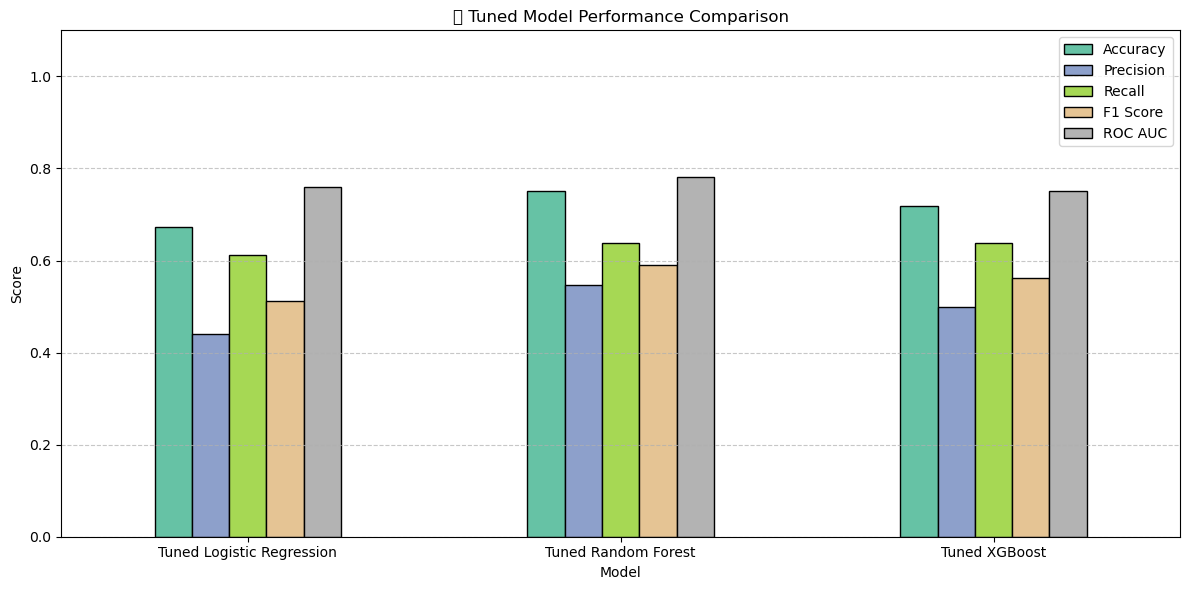

In [24]:
metrics_df = pd.DataFrame({
    "Model": ["Tuned Logistic Regression", "Tuned Random Forest", "Tuned XGBoost"],
    "Accuracy": [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)],
    "Precision": [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_xgb)],
    "Recall": [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_xgb)],
    "F1 Score": [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_xgb)],
    "ROC AUC": [auc_lr, auc_rf, auc_xgb]
})

metrics_df.set_index("Model", inplace=True)

# Bar Chart
metrics_df.plot(kind="bar", figsize=(12, 6), colormap="Set2", edgecolor="black")
plt.title("📊 Tuned Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 7: Save Best Models

In [30]:
import joblib
### joblib.dump(best_lr, "../models/best_logistic_regression.pkl")

In [31]:
joblib.dump(best_rf, "../models/best_random_forest.pkl")

['../models/best_random_forest.pkl']

In [32]:
### joblib.dump(best_xgb, "../models/best_xgboost.pkl")